# From Theory to Practice: Text Generation with Transformer Language Models  
### Crash Course in Generative AI


## Abstract

Generative AI has transformed how we create text, images, audio, and more. Behind these capabilities lie several families of generative models, including Generative Adversarial Networks (GANs), Variational Autoencoders (VAEs), Diffusion Models, and Transformer-based language models.  

This notebook provides a concise crash course on generative AI with a **practical focus on Transformer-based language models for text generation**, specifically using a pre-trained **GPT-2** model.  

Readers will:

- Understand the main **types of generative models** and where they are used.
- Learn the **core architecture principles** of Transformer language models.
- Explore **training methodologies** and key **challenges** in generative modeling.
- Review standard **evaluation metrics** for generative models.
- Implement **hands-on Python examples** using GPT-2 to:
  - Generate text from a prompt.
  - Experiment with decoding parameters such as **temperature**, **top-k**, and **top-p**.
  - Visualize **next-token probabilities** to gain intuition about model behavior.

By the end of this notebook, you will understand how modern text generators are built and trained, and how they power applications in **natural language processing, computer vision (via text conditioning), and creative industries** such as copywriting, storytelling, and code generation.


## Table of Contents

1. [Introduction](#introduction)
2. [Theory: Foundations of Generative Models](#theory)
   - [2.1 Types of Generative Models](#types-of-generative-models)
     - GANs  
     - VAEs  
     - Diffusion Models  
     - Transformer-based Language Models  
   - [2.2 Architecture Principles](#architecture-principles)
   - [2.3 Training Methodologies and Challenges](#training-methodologies)
   - [2.4 Evaluation Metrics](#evaluation-metrics)
3. [Practical Examples: Text Generation with GPT-2](#practical-examples)
   - [3.1 Environment Setup](#environment-setup)
   - [3.2 Loading GPT-2](#loading-gpt2)
   - [3.3 Basic Text Generation](#basic-generation)
   - [3.4 Effect of Temperature](#temperature-effect)
   - [3.5 Top-k and Top-p Sampling](#topk-topp)
   - [3.6 Visualizing Next-token Probabilities](#token-probabilities)
4. [Conclusion](#conclusion)
5. [References](#references)
6. [License](#license)


<a id="introduction"></a>

## 1. Introduction

Generative AI refers to a class of machine learning techniques that **generate new data** resembling a given training distribution. Instead of simply classifying or regressing on existing data, generative models can:

- Create **realistic images** from noise.
- Generate **coherent paragraphs** of text from a short prompt.
- Produce **music, audio, or code** that follows learned patterns.

Recent advances, particularly **Transformer-based language models**, have driven widespread adoption of generative AI in applications such as chatbots, translation, content creation, and code assistance.

In this notebook, we:

1. Provide a theoretical overview of major generative model families.
2. Dive deeper into **Transformer language models**.
3. Implement practical examples using **GPT-2** to generate and analyze text.


<a id="theory"></a>

## 2. Theory: Foundations of Generative Models

<a id="types-of-generative-models"></a>

### 2.1 Types of Generative Models

Modern generative modeling contains several important families. Here we briefly introduce four of the most influential ones.

---

#### 2.1.1 Generative Adversarial Networks (GANs)

**Key idea:** Train two neural networks in a **minimax game**:

- A **Generator (G)** takes random noise and tries to produce realistic samples (e.g., images).
- A **Discriminator (D)** tries to distinguish between real samples from the dataset and fake samples from the generator.

Over time:
- The generator improves at fooling the discriminator.
- The discriminator improves at telling real from fake.

**Applications:**
- Image synthesis (e.g., faces, scenes).
- Image-to-image translation (e.g., sketches → photos).
- Style transfer and super-resolution.

**Challenges:**
- Training instability and sensitivity to hyperparameters.
- Mode collapse (generator produces limited variety).

---

#### 2.1.2 Variational Autoencoders (VAEs)

**Key idea:** Learn a **latent variable model** that encodes data into a continuous latent space and decodes back to the original domain.

- **Encoder**: Maps input data (e.g., images) to a distribution over latent variables (mean and variance).
- **Decoder**: Samples from the latent distribution and reconstructs the input.

The training objective combines:
- **Reconstruction loss** (how well the input is reconstructed).
- **KL-divergence** regularization (how close the latent distribution is to a prior, usually a standard Gaussian).

**Applications:**
- Generating smooth variations of images.
- Latent space interpolation.
- Anomaly detection.

**Challenges:**
- Blurry reconstructions for images.
- Balance between reconstruction quality and latent regularization.

---

#### 2.1.3 Diffusion Models

**Key idea:** Learn to **reverse a diffusion (noising) process**.

- Forward process: Gradually add noise to data over many steps, eventually reaching pure noise.
- Reverse process: Train a neural network to **remove noise step-by-step**, reconstructing the original data distribution.

After training, generation starts from pure noise and iteratively denoises to produce realistic samples.

**Applications:**
- High-fidelity image generation.
- Text-to-image models (e.g., prompt → image).
- Audio and video synthesis.

**Strengths:**
- Excellent image quality.
- More stable training compared to GANs.

---

#### 2.1.4 Transformer-based Language Models

**Key idea:** Use **self-attention** to model dependencies between tokens (words, subwords, characters) in a sequence.

- Tokens are embedded into vectors.
- Multiple **self-attention layers** allow each token to attend to others.
- Output is a distribution over the next token, given previous ones.

**Decoder-only Transformers** (like GPT-2) are trained with a simple objective:

> Predict the next token given all previous tokens.

During generation, the model:
1. Consumes an initial prompt.
2. Predicts the next token.
3. Appends it to the sequence.
4. Repeats to build long sequences of text.

**Applications:**
- Text generation, translation, summarization.
- Chatbots and conversational agents.
- Code generation and assistance.
- Conditioning other modalities (e.g., text-to-image).

These models are the **focus of the practical section** of this notebook.


<a id="architecture-principles"></a>

### 2.2 Architecture Principles

Although the generative models mentioned vary in structure, Transformer-based language models share a few critical architectural components:

1. **Tokenization and Embeddings**
   - Raw text is split into tokens (words, subwords, or characters).
   - Each token is mapped to a dense **embedding vector**.
   - Positional encodings are added to embeddings to represent the token's position.

2. **Self-Attention Mechanism**
   - Each layer computes **queries (Q)**, **keys (K)**, and **values (V)** from the embeddings.
   - Attention weights are computed as:
     \[
     \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
     \]
   - **Masked self-attention** is used in decoder-only models so a token cannot attend to future tokens.

3. **Multi-Head Attention**
   - Multiple attention “heads” learn different types of relationships in parallel.
   - Outputs are concatenated and linearly transformed.

4. **Feedforward Networks**
   - After attention, each position passes through a small **fully connected network** (typically two linear layers with a non-linearity).

5. **Residual Connections and Layer Normalization**
   - Residual skips and normalization provide stable training.
   - Output of each sub-layer is:
     \[
     \text{LayerNorm}(x + \text{SubLayer}(x))
     \]

6. **Output Projection and Softmax**
   - Final hidden states are projected to vocabulary size.
   - A softmax over the vocabulary yields a **probability distribution over next tokens**.

These components, stacked many times, produce a powerful sequence model that can approximate complex language distributions.


<a id="training-methodologies"></a>

### 2.3 Training Methodologies and Challenges

#### Training Objective for Language Models

Decoder-only Transformers are typically trained with **maximum likelihood estimation**:

- Given a sequence of tokens \( x_1, x_2, ..., x_T \),
- The model learns to maximize:
  \[
  \log P(x_1, x_2, ..., x_T) = \sum_{t=1}^{T} \log P(x_t \mid x_1, ..., x_{t-1})
  \]

This is implemented as **next-token prediction** using a cross-entropy loss over the vocabulary at each step.

#### Training Pipeline

1. Collect a large corpus of text.
2. Tokenize into subword units.
3. Form sequences of fixed length (e.g., 512 tokens).
4. Train with mini-batch gradient descent, often on GPUs/TPUs.

#### Common Challenges

- **Data Quality and Bias**
  - Model reflects patterns and biases from its training data.
  - May generate toxic, biased, or incorrect content.

- **Exposure Bias**
  - At training time, the model always sees ground-truth previous tokens.
  - At generation time, it conditions on its own (possibly mistaken) outputs.

- **Hallucinations**
  - Model may generate plausible-sounding but factually incorrect statements.
  - Important for safety-critical or factual applications.

- **Compute and Energy Cost**
  - Large models require significant compute and energy to train.
  - Deployment also requires optimization for latency and cost.

Understanding these challenges is crucial when designing real-world generative AI systems.


<a id="evaluation-metrics"></a>

### 2.4 Evaluation Metrics for Generative Models

Evaluating generative models is non-trivial because **multiple outputs can be “correct”**. Some common metrics:

#### For Language Models

1. **Perplexity**
   - Measures how well a model predicts a sequence.
   - Lower perplexity indicates better predictive performance.
   - Defined as:
     \[
     \text{Perplexity} = e^{-\frac{1}{N} \sum_{i=1}^{N} \log P(x_i)}
     \]

2. **BLEU / ROUGE**
   - Compare generated text to one or more reference texts.
   - BLEU: precision-based; common in translation.
   - ROUGE: recall-oriented; common in summarization.

3. **Human Evaluation**
   - Evaluate fluency, coherence, relevance, and factual correctness.
   - Often necessary for high-quality generative tasks.

#### For Image Generators (GANs, Diffusion)

1. **Inception Score (IS)**
2. **Fréchet Inception Distance (FID)**
   - Compares statistics of generated images to real images in a feature space.

#### Qualitative Exploration

- Manual inspection of **diversity**, **coherence**, and **style**.
- Visualization of **latent spaces** or **attention maps** to understand model behavior.

In this notebook, we rely mainly on **qualitative evaluation** by inspecting generated text and, in one example, visualizing **next-token probabilities**.


<a id="practical-examples"></a>

## 3. Practical Examples: Text Generation with GPT-2

We now move from theory to practice.  
In this section, we will:

1. Set up the Python environment.
2. Load a pre-trained **GPT-2** model from Hugging Face.
3. Implement and compare different **text generation strategies**:
   - Basic greedy decoding.
   - Sampling with different **temperatures**.
   - **Top-k** and **top-p** (nucleus) sampling.
4. Visualize **next-token probabilities** to better understand the model's behavior.

> **Note:** These examples are designed to run on CPU, but having a GPU will speed things up.


In [1]:
# 3.1 Environment Setup

# If you are running this in an environment where transformers/torch are not installed,
# uncomment and run the following lines (e.g., in Google Colab).

# !pip install transformers torch matplotlib --quiet

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Check device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

In [2]:
# 3.2 Loading GPT-2

model_name = "gpt2"  # small, lightweight model

tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)
model.to(device)
model.eval()

print(f"Loaded model: {model_name}")
print(f"Model device: {next(model.parameters()).device}")
print(f"Vocabulary size: {tokenizer.vocab_size}")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Loaded model: gpt2
Model device: cpu
Vocabulary size: 50257


<a id="basic-generation"></a>

### 3.3 Basic Text Generation

We define a helper function to:

- Take a **prompt** as input.
- Allow control over:
  - `max_length`
  - `temperature`
  - `top_k`
  - `top_p`
  - `num_return_sequences`
- Return generated texts decoded from token IDs.

We will first use this function with relatively conservative parameters to see vanilla GPT-2 behavior.


In [3]:
def generate_text(
    prompt: str,
    max_length: int = 60,
    temperature: float = 1.0,
    top_k: int = 0,
    top_p: float = 1.0,
    num_return_sequences: int = 1,
    do_sample: bool = True,
):
    """
    Generate text from GPT-2 given a text prompt and decoding parameters.
    """
    # Encode the input prompt
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # Use model.generate for flexible decoding
    output_sequences = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p,
        do_sample=do_sample,
        num_return_sequences=num_return_sequences,
        pad_token_id=tokenizer.eos_token_id,
    )

    # Decode the generated sequences
    generated_texts = []
    for generated_seq in output_sequences:
        text = tokenizer.decode(generated_seq, skip_special_tokens=True)
        generated_texts.append(text)

    return generated_texts


In [4]:
# Basic generation example

prompt = "The future of artificial intelligence is"
outputs = generate_text(
    prompt=prompt,
    max_length=60,
    temperature=1.0,
    top_k=0,      # 0 means no top-k filtering
    top_p=1.0,    # 1.0 means no nucleus filtering
    num_return_sequences=1,
)

print("Prompt:")
print(prompt)
print("\nGenerated completion:")
print(outputs[0])


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Prompt:
The future of artificial intelligence is

Generated completion:
The future of artificial intelligence is yet to come and at least until we get specific help from ARAs our cognition has to improve so that it can be understood more clearly. So I am working on what I call the "Human Consciousness" as we developed into a functional laboratory. We would like people


<a id="temperature-effect"></a>

### 3.4 Effect of Temperature

**Temperature** controls how "flat" or "peaked" the probability distribution over the next token is:

- **Low temperature (e.g., 0.2)**:
  - Distribution is sharpened.
  - Model becomes more **deterministic** and conservative.
  - Outputs are often repetitive or safe.

- **Medium temperature (e.g., 0.7)**:
  - Good balance between coherence and creativity.

- **High temperature (e.g., 1.2)**:
  - Distribution is flattened.
  - Model is more **random and creative**, but may lose coherence.

We generate multiple completions for the **same prompt** using different temperatures.


In [5]:
prompt = "In the next decade, humans and AI will"

temperatures = [0.2, 0.7, 1.2]

for temp in temperatures:
    print("=" * 80)
    print(f"Temperature = {temp}")
    outputs = generate_text(
        prompt=prompt,
        max_length=60,
        temperature=temp,
        top_k=0,
        top_p=1.0,
        num_return_sequences=1,
    )
    print(outputs[0])
    print()


Temperature = 0.2
In the next decade, humans and AI will be able to interact with each other, and the world will be more connected.

The next generation of AI will be able to do things like create and manipulate objects, and interact with people.

The next generation of AI will be able to

Temperature = 0.7
In the next decade, humans and AI will have been building, and constructing, information processing and control systems, and they will be aware of it. They will be able to predict the future, respond to it, and learn from it. This is the future of the human mind.


In

Temperature = 1.2
In the next decade, humans and AI will increase driving capacities on all highways where being safe also increases intelligence and generosity. But doing so in comparison not only impractical; It forces its gainers to think about 28 underlying epistemology as being mere leverages to proceed from thing forward. Since Amazon Prime



<a id="topk-topp"></a>

### 3.5 Top-k and Top-p Sampling

While temperature rescales the distribution, **top-k** and **top-p** (nucleus) sampling change **which tokens** we allow the model to sample from.

- **Top-k sampling**
  - Keep only the **k most probable tokens** at each step.
  - Re-normalize probabilities over this small set.
  - Example: `top_k=50`.

- **Top-p (nucleus) sampling**
  - Keep the **smallest set of tokens** whose cumulative probability exceeds **p**.
  - Re-normalize over that set.
  - Example: `top_p=0.9`.

These methods reduce the chance of sampling very low-probability (nonsensical) tokens while retaining diversity.

We now compare:

1. Greedy decoding (`do_sample=False`).
2. Sampling with **top-k**.
3. Sampling with **top-p**.


In [6]:
prompt = "A startup founder asked an AI assistant for advice on"

print("Prompt:")
print(prompt)
print("\n" + "=" * 80)

# 1. Greedy (no sampling, temperature ignored)
input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
greedy_output = model.generate(
    input_ids=input_ids,
    max_length=80,
    do_sample=False,  # greedy
    pad_token_id=tokenizer.eos_token_id,
)
print("Greedy decoding:")
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))
print("\n" + "=" * 80)

# 2. Top-k sampling
topk_outputs = generate_text(
    prompt=prompt,
    max_length=80,
    temperature=0.8,
    top_k=50,
    top_p=1.0,
    num_return_sequences=1,
)

print("Top-k sampling (k=50, temp=0.8):")
print(topk_outputs[0])
print("\n" + "=" * 80)

# 3. Top-p sampling
topp_outputs = generate_text(
    prompt=prompt,
    max_length=80,
    temperature=0.8,
    top_k=0,
    top_p=0.9,
    num_return_sequences=1,
)

print("Top-p sampling (p=0.9, temp=0.8):")
print(topp_outputs[0])
print("\n" + "=" * 80)


Prompt:
A startup founder asked an AI assistant for advice on

Greedy decoding:
A startup founder asked an AI assistant for advice on how to make a better app.

"I'm not sure how to do it," he said. "I'm not sure how to do it. I'm not sure how to do it."

The AI assistant, who asked not to be named, said she was not sure how to do it.

"I'm not

Top-k sampling (k=50, temp=0.8):
A startup founder asked an AI assistant for advice on how to go about managing a large-scale distributed ledger network.

"If you want to know how to run an application on the Ethereum blockchain, I think you'd go through a number of processes," she said.

In the end, it turns out that the main difference between blockchain-based applications and distributed systems is that you need

Top-p sampling (p=0.9, temp=0.8):
A startup founder asked an AI assistant for advice on how to start a business. The AI assistant didn't seem to know anything about AI, and he asked what the best way to start a business was.

After 

<a id="token-probabilities"></a>

### 3.6 Visualizing Next-token Probabilities

To build intuition about **how GPT-2 "thinks"**, we can:

1. Feed a short prompt into the model.
2. Extract the **logits** (unnormalized scores) for the **next token**.
3. Apply a **softmax** to obtain probabilities.
4. Visualize the **top 10 most likely tokens** as a bar chart.

This gives a tangible picture of:

- Which tokens the model deems likely next steps.
- How sharply focused or spread out the distribution is.


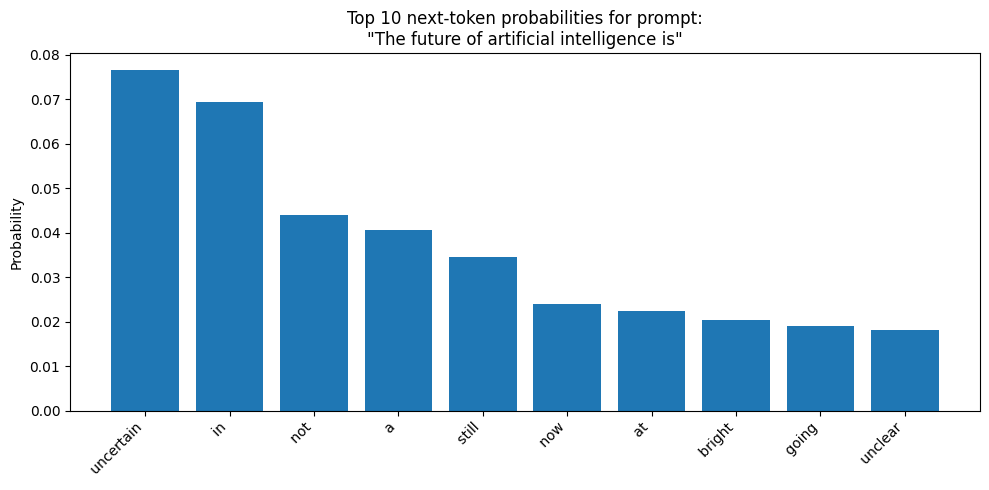

In [7]:
def plot_next_token_distribution(prompt: str, top_n: int = 10):
    """
    Plot the distribution of the top N most probable next tokens for a given prompt.
    """
    model.eval()
    with torch.no_grad():
        # Encode prompt
        input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

        # Get logits from the model
        outputs = model(input_ids)
        logits = outputs.logits  # shape: [batch_size, seq_len, vocab_size]

        # Take the logits of the last token in the sequence
        last_token_logits = logits[0, -1, :]

        # Convert to probabilities
        probs = F.softmax(last_token_logits, dim=-1)

        # Get top N tokens
        top_probs, top_indices = torch.topk(probs, top_n)

        # Decode token indices to strings
        top_tokens = [tokenizer.decode([idx]) for idx in top_indices]

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(top_tokens, top_probs.cpu().numpy())
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Probability")
    plt.title(f"Top {top_n} next-token probabilities for prompt:\n\"{prompt}\"")
    plt.tight_layout()
    plt.show()


prompt = "The future of artificial intelligence is"
plot_next_token_distribution(prompt, top_n=10)


### Discussion: Limitations and Responsible Use

While GPT-2 and similar models can generate impressive and coherent text, it is important to acknowledge their limitations:

- They do **not understand** language in a human sense; they model statistical patterns.
- They can generate **biased, offensive, or factually incorrect** content.
- They may output **hallucinations**—confidently stated but false information.
- They should be used with **human oversight**, particularly in sensitive domains
  (e.g., healthcare, legal, financial advice).

In real-world systems, text generation is often combined with:
- **Prompt design and constraints.**
- **Filtering, moderation, and safety layers.**
- **Retrieval of factual data** from trusted sources.


<a id="conclusion"></a>

## 4. Conclusion

In this notebook, we explored both the **theoretical foundations** and a **practical implementation** of generative AI, with a focus on Transformer-based language models:

- We surveyed major classes of generative models:
  - **GANs** for adversarial training and image synthesis.
  - **VAEs** for continuous latent variable modeling.
  - **Diffusion models** for iterative denoising and high-fidelity images.
  - **Transformers** for sequence modeling and text generation.

- We examined core **architecture principles** of Transformer language models:
  - Tokenization, embeddings, self-attention, feedforward layers, and output projections.

- We discussed **training methodologies and challenges**, including:
  - Maximum likelihood training, exposure bias, and hallucinations.

- We reviewed key **evaluation metrics**, such as perplexity, BLEU/ROUGE, FID, and human evaluation.

- We implemented hands-on examples with **GPT-2** to:
  - Generate text from prompts.
  - Analyze the effects of **temperature**, **top-k**, and **top-p**.
  - Visualize **next-token probabilities** to understand model uncertainty.

Generative AI, and Transformer-based language models in particular, now underpin many applications in:
- **Natural Language Processing** (chatbots, summarization, translation),
- **Computer Vision** (via text-conditioned image generation),
- **Creative industries** (storytelling, copywriting, code assistants, game dialogue).

Understanding the theory and having practical experience with these models is essential for designing responsible and effective generative AI systems.


<a id="references"></a>

## 5. References

Below is a non-exhaustive list of references and resources that informed this notebook:

- **Transformer & Language Models**
  - Vaswani, A. et al. (2017). *Attention Is All You Need.*
  - Radford, A. et al. (2019). *Language Models are Unsupervised Multitask Learners* (GPT-2).
  - Brown, T. et al. (2020). *Language Models are Few-Shot Learners* (GPT-3).

- **GANs**
  - Goodfellow, I. et al. (2014). *Generative Adversarial Networks.*

- **VAEs**
  - Kingma, D. P., & Welling, M. (2013). *Auto-Encoding Variational Bayes.*

- **Diffusion Models**
  - Ho, J. et al. (2020). *Denoising Diffusion Probabilistic Models.*

- **Libraries and Documentation**
  - Hugging Face Transformers Documentation: https://huggingface.co/docs/transformers
  - PyTorch Documentation: https://pytorch.org/docs/
  - Matplotlib Documentation: https://matplotlib.org/stable/contents.html


<a id="license"></a>

## 6. License

Unless otherwise specified by your course or institution, you may use the following license for this notebook:

**License: Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)**

You are free to:

- **Share** — copy and redistribute the material in any medium or format.
- **Adapt** — remix, transform, and build upon the material.

Under the following terms:

- **Attribution** — You must give appropriate credit, provide a link to the license,
  and indicate if changes were made. You may do so in any reasonable manner,
  but not in any way that suggests the licensor endorses you or your use.
- **NonCommercial** — You may not use the material for commercial purposes.

For more details, see: https://creativecommons.org/licenses/by-nc/4.0/
